In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sktime.forecasting.naive import NaiveForecaster

In [19]:
class NaiveSeasonality():
    def __init__(self, seasonality):
        self.seasonality = seasonality
        self.trend = None
        self.last_season = None
    def fit(self, train):
        self.trend = train['sinx'].iloc[-self.seasonality:].mean() / train['sinx'].iloc[- 2* self.seasonality: -self.seasonality].mean()
        self.last_season = train['sinx'].iloc[-self.seasonality:].tolist()
    def predict(self, indices):
        x = np.linspace(0, 10, 250)
        x = x[indices[0]:indices[-1] + 1]
        return pd.DataFrame({'indices': indices, 'y_pred': self.last_season + (self.trend-1)*x}).set_index('indices')

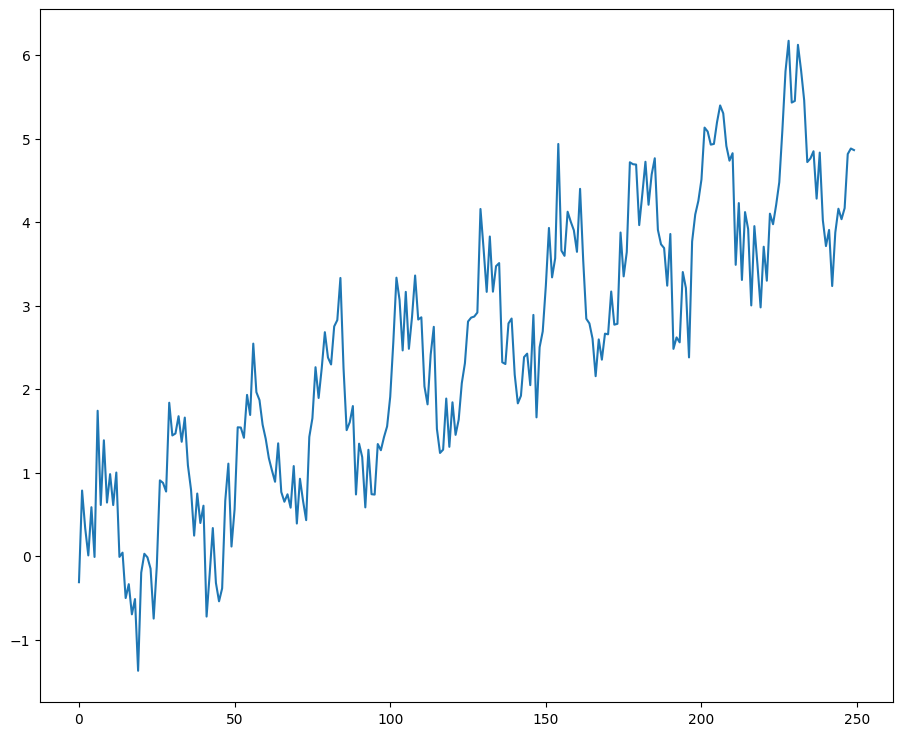

In [20]:
x = np.linspace(0,10, 250)
y = np.sin(x*2*np.pi) + 0.5*x +  np.random.randn(250)*0.4
sin_df = pd.DataFrame({'sinx': y})
plt.plot(sin_df)
train = sin_df[:225]
test = sin_df[225:]


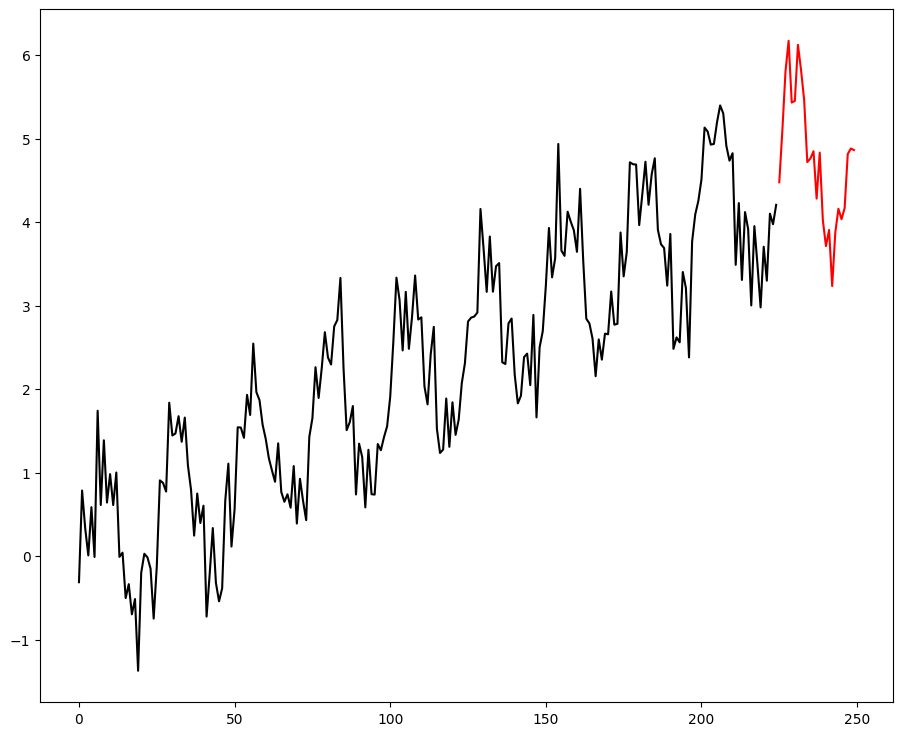

In [21]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.show()

In [22]:
forecaster = NaiveSeasonality(seasonality=25)
forecaster.fit(train)

In [23]:
forecaster.trend

1.1252081327306382

In [24]:
ph = np.arange(225, 250)
pred = forecaster.predict(ph)

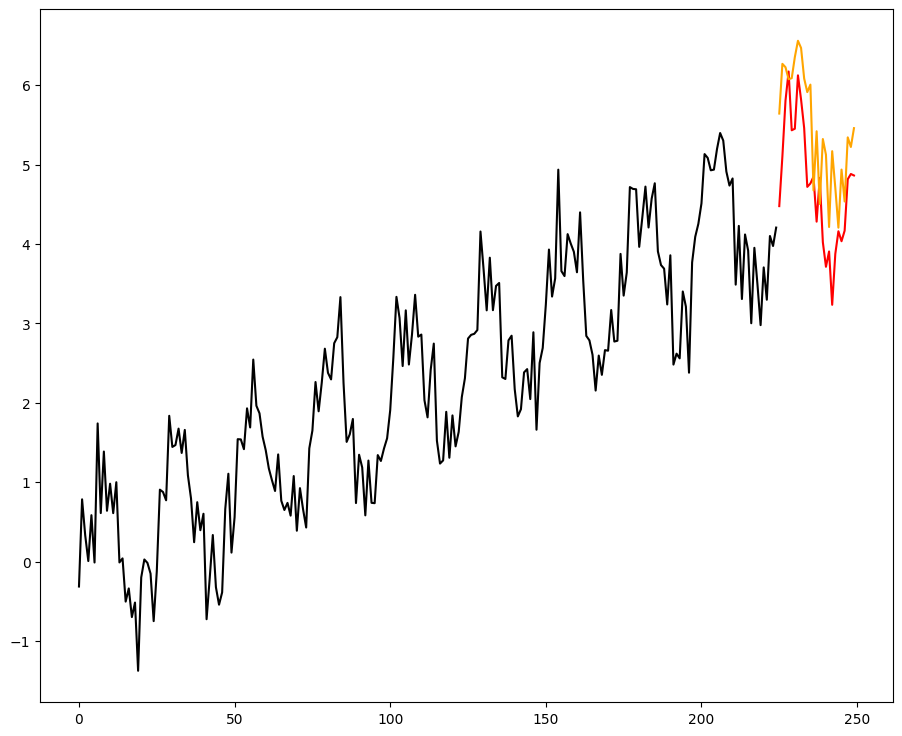

In [25]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(pred, color = "orange")

plt.show()

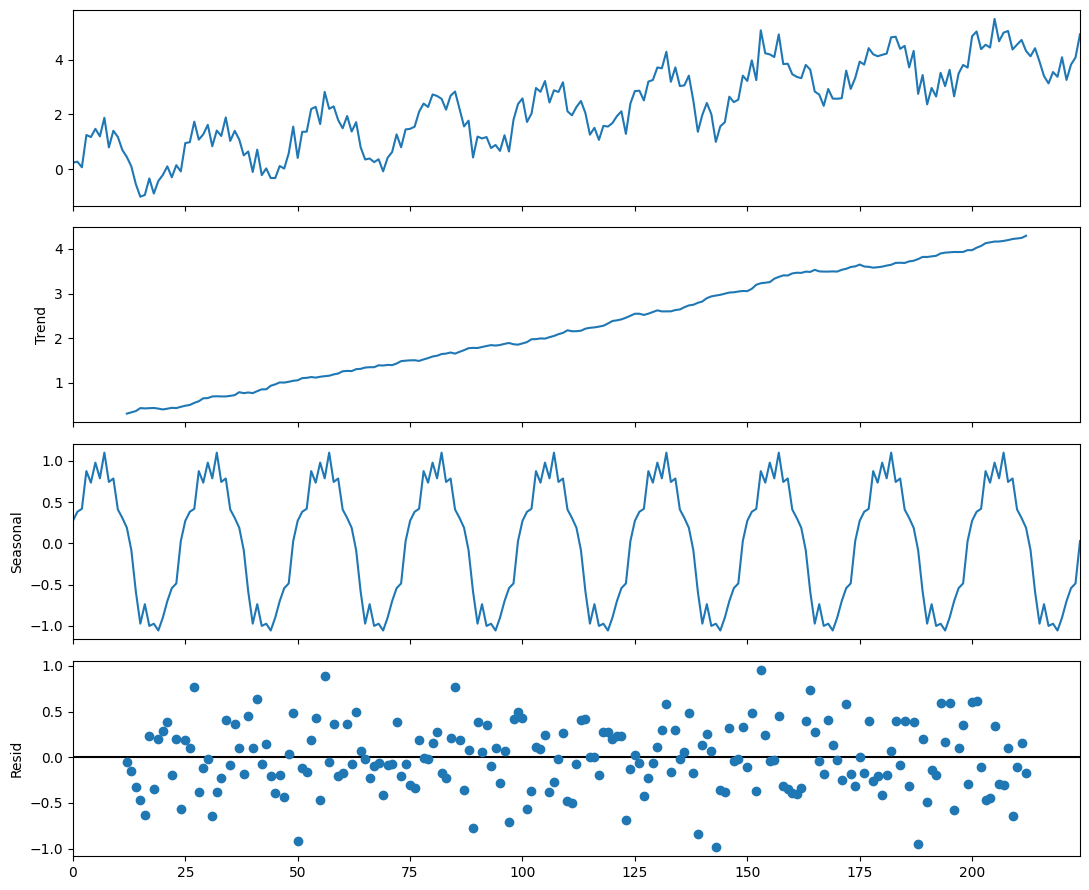

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# задаем размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

# применяем функцию к данным о перевозках
decompose = seasonal_decompose(train, period=25)
decompose.plot()

plt.show()

In [18]:
decompose.trend

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
220   NaN
221   NaN
222   NaN
223   NaN
224   NaN
Name: trend, Length: 225, dtype: float64

In [270]:
pip install statsmodels

  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/d5/7e/61ec96b208af273126a211a9aa1c9dfefb216725192973fc52a858ac9219/statsmodels-0.14.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for patsy>=0.5.6 from https://files.pythonhosted.org/packages/43/f3/1d311a09c34f14f5973bb0bb0dc3a6e007e1eda90b5492d082689936ca51/patsy-0.5.6-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.9 MB 1.1 MB/s eta 0:00:10
   ---------------------------------------- 0.1/9.9 MB 901.1 kB/s eta 0:00:11
    --------------------------------------- 0.2/9.9 MB 1.4 MB/s eta 0:00:07
   - -------------------------------------- 0.4/9.9 MB 1.6 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/9.9 MB 1.9 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/9.9 MB 2.


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
